## Load Modules

In [366]:
using MLJ
using MultivariateStats
using Plots; gr()
using CSV
using DataFrames
using StatsBase
using Clustering: randindex, silhouettes, varinfo, vmeasure, mutualinfo
using LinearAlgebra: diag
using PyCall

In [367]:
ENV["LINES"] = 100;

In [405]:
RNG = 133;

## Import Data and Set Up

In [406]:
data = CSV.read("biodegradation.csv")
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


In [407]:
label_counts = countmap(data[:(Class)])
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

In [408]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [409]:
y, X = unpack(data, ==(:Class), colname->true)
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=RNG, stratify=values(data[:Class])) # gives 70:30 split

([814, 165, 622, 67, 804, 252, 769, 264, 70, 796  …  688, 257, 358, 278, 946, 284, 815, 56, 259, 17], [22, 598, 701, 445, 36, 20, 146, 811, 710, 923  …  932, 570, 176, 561, 1031, 816, 371, 970, 989, 109])

#### Confirming that data was stratified correctly

In [410]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [411]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

#### Standardizing data pre-clustering
* https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering

In [412]:
standardizer = Standardizer(count=true)
stand = machine(standardizer, X) #only want to standardize on training distribution
MLJ.fit!(stand, rows=train)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @891.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


In [413]:
train_data = convert(Matrix,X_stand[train,:])

738×41 Array{Float64,2}:
  0.228487    -1.57344     -0.483706  …  -0.0304587   -0.16698  -0.315475
 -0.143536     0.0083341   -0.483706     -0.387351    -0.16698  -0.315475
  1.33127      2.78452      0.979306      4.92863     -0.16698  -0.315475
  0.105112     0.332672    -0.483706     -0.24996     -0.16698  -0.315475
 -1.53293     -1.26366     -0.483706     -0.974312    -0.16698  -0.315475
 -0.551623    -0.209535    -0.483706  …  -0.576772    -0.16698  -0.315475
  0.558752     1.47519     -0.483706     -0.605226    -0.16698  -0.315475
  0.0652522   -0.72709     -0.483706     -0.170289    -0.16698  -0.315475
  0.505606     0.0181945   -0.483706      0.123192     5.70118  -0.315475
 -0.502273    -0.394535    -0.483706     -0.278413    -0.16698  -0.315475
  0.0329849    0.137224     1.71081   …   0.36383     -0.16698   1.01493
 -0.876194     0.446889    -0.483706     -0.737739    -0.16698  -0.315475
 -3.43101     -1.3517      -0.483706     -2.20108     -0.16698  -0.315475
 -0.466209    

## Set up model

In [414]:
task(model) = !model.is_supervised
models(task)

32-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = ContinuousEncoder, package_name = MLJModels, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FactorAnalysis, package_name = MultivariateStats, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name 

# Clustering Algorithms
Run the clustering algorithms on the datasets and describe what you see.

### KMeans
* https://github.com/PyDataBlog/ParallelKMeans.jl/blob/master/src/hamerly.jl#L65
* https://juliastats.org/Clustering.jl/stable/validate.html

In [415]:
@load KMeans pkg=ParallelKMeans
# @load KMeans pkg=Clustering

KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @493

In [416]:
# https://stackoverflow.com/questions/51181392/julia-vs-matlab-distance-matrix-run-time-test
function dist_mat(X::Matrix)
    G = X * X'
    dG = diag(G)
    return sqrt.(dG .+ dG' .- 2 .* G)
end

dist_mat (generic function with 1 method)

In [417]:
upper = 8
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, X_stand)
    MLJ.fit!(mach, rows=train)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

K = 2
Iteration 1: Jclust = 56302.57851561873
Iteration 2: Jclust = 28188.785953114722
Iteration 3: Jclust = 29099.152762146925
Iteration 4: Jclust = 28462.951072449534
Iteration 5: Jclust = 28691.015987457038
Iteration 6: Jclust = 28568.87843605133
Iteration 7: Jclust = 28516.31895023834
Iteration 8: Jclust = 28479.442451417053
Iteration 9: Jclust = 28452.87835225411
Iteration 10: Jclust = 28551.664319077598
Iteration 11: Jclust = 28439.550561300628
Iteration 12: Jclust = 28246.821567534724
Iteration 13: Jclust = 28314.838545552535
Iteration 14: Jclust = 28475.655252076154
Iteration 15: Jclust = 28475.655252076154
Successfully terminated with convergence.
mach.report.totalcost = 27035.69291215478
l = [(1, 249), (2, 489)]


┌ Info: Training Machine{KMeans} @629.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


silhouette: 0.2053891773097492

K = 3
Iteration 1: Jclust = 52166.70586725931
Iteration 2: Jclust = 26653.305975588133
Iteration 3: Jclust = 27316.62701226548
Iteration 4: Jclust = 26387.32164921845
Iteration 5: Jclust = 26277.0749417549
Iteration 6: Jclust = 26564.68250054364
Iteration 7: Jclust = 26584.468569995
Iteration 8: Jclust = 26656.12547690521
Iteration 9: Jclust = 26760.43998140568
Iteration 10: Jclust = 26822.37877533264
Iteration 11: Jclust = 26879.777947863593
Iteration 12: Jclust = 26869.685180019133
Iteration 13: Jclust = 26860.25857475475
Iteration 14: Jclust = 26897.914958819332
Iteration 15: Jclust = 26905.822836013485
Iteration 16: Jclust = 26864.971883763013
Iteration 17: Jclust = 26864.971883763013
Successfully terminated with convergence.
mach.report.totalcost = 25512.861545992324
l = [(1, 166), (2, 397), (3, 175)]
silhouette: 0.11064261401125847

K = 4
Iteration 1: Jclust = 49318.75807073221
Iteration 2: Jclust = 24471.748491567694
Iteration 3: Jclust = 25251.14

┌ Info: Training Machine{KMeans} @081.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @017.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @850.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @263.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @168.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @606.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


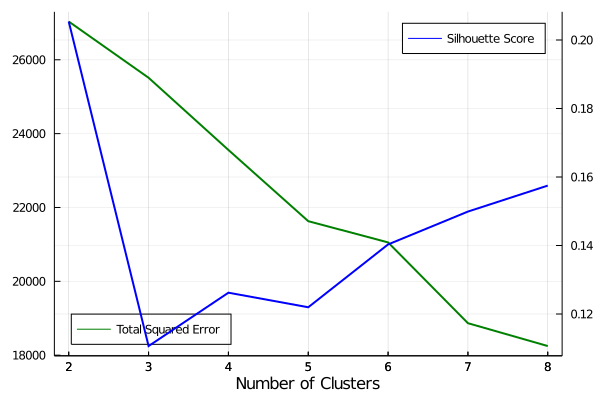

In [418]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [419]:
savefig("figures/bio_kmeans_metrics_$upper")

In [420]:
function prepare_portfolio(ls)
    N = size(ls)[1]
    D = size(ls[end])[1]
    mat = zeros(N, D)
    for i in 1:N
#         print("\n")
#         @show i
        for j in 1:size(ls[i])[1]
#             @show j
            mat[i,j] = ls[i][j][2]
        end
    end
    return mat
end

prepare_portfolio (generic function with 1 method)

In [421]:
function cum_columns(mat; normalize=false)
    mat2 = deepcopy(mat)
    normalize && (mat2 ./= sum(mat2, dims = 2)) # if you want to normalize each row
    for i in 2:size(mat2)[2]
       mat2[:,i] = mat2[:,i-1] + mat2[:,i]
    end
    return mat2'
end

cum_columns (generic function with 1 method)

In [422]:
function cum_plot(mat)
    N = size(mat)[2]
    p = plot(legend=:outertopright, palette=palette(:Accent_8))
    for i in N+1:-1:1
        plot!(1:N, mat[i,:], label="Cluster $(i)", fill=0, α=1)
    end
    xticks!(collect(1:N),string.(collect(2:N+1)))
    ylabel!("Cluster Proportion")
    xlabel!("Number of Clusters")
    display(p)
end

cum_plot (generic function with 1 method)

In [423]:
# plotattr(:Series)
plotattr("fillrange")

fillrange {Number or AbstractVector}
fill_between, fillbetween, fillranges, fillrng, fillto, frange

Fills area between fillrange and y for line-types, sets the base for bar/stick types, and similar for other types.
Series attribute,  default: nothing


In [424]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

8×7 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.337398  0.224932  0.210027  0.135501  0.166667  0.173442  0.173442
 1.0       0.762873  0.750678  0.589431  0.634146  0.246612  0.246612
 1.0       1.0       0.949864  0.672087  0.704607  0.261518  0.261518
 1.0       1.0       1.0       0.722222  0.754743  0.311653  0.287263
 1.0       1.0       1.0       1.0       0.97832   0.542005  0.517615
 1.0       1.0       1.0       1.0       1.0       0.563686  0.539295
 1.0       1.0       1.0       1.0       1.0       1.0       0.97561
 1.0       1.0       1.0       1.0       1.0       1.0       1.0

#### Explanation
For the plot, the area below each line indicates the proportion of the instances that are contained in that cluster. X-axis is number of clusters in that Kmeans run. So for 2 means, there are 2 clusters. For 5 means, there is a large cluster 1, a large cluster 4, and a large cluster 5. Up to runs as large as 6 clusters, there are really only 3 prevalent clusters. Farther than that, it becomes more fragmented. 3 clusters

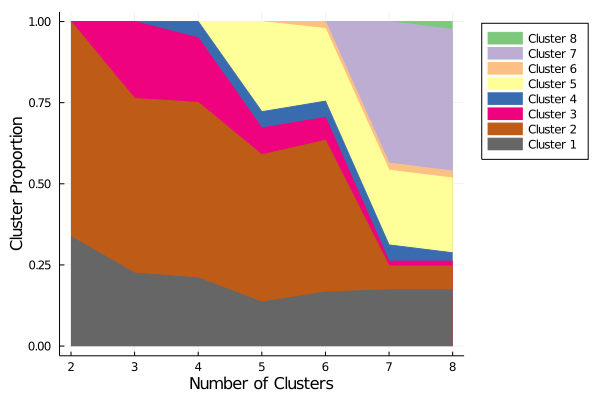

In [425]:
cum_plot(plotmat)

In [426]:
savefig("figures/bio_kmeans_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 3 clusters

#### Verifying Clusters

In [427]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

738-element Array{Tuple{Int64,Int64},1}:
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 1)
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 2)
 (3, 2)
 (3, 2)
 (2, 2)
 (1, 2)
 (2, 2)
 (2, 1)
 (1, 1)
 (2, 1)
 (1, 1)
 (1, 1)
 (2, 1)
 (1, 1)
 (3, 2)
 (2, 1)
 (1, 2)
 (1, 2)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 2)
 (2, 2)
 (2, 2)
 (2, 2)
 (3, 2)
 (1, 1)
 (2, 2)
 (3, 2)
 (2, 2)
 (3, 2)
 ⋮
 (2, 1)
 (3, 1)
 (1, 1)
 (3, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 2)
 (3, 2)
 (1, 2)
 (1, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 1)
 (3, 2)
 (3, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 1)
 (2, 1)
 (3, 2)
 (2, 2)
 (1, 2)
 (2, 2)
 (3, 2)
 (1, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (1, 1)
 (2, 1)
 (3, 2)
 (2, 2)
 (1, 1)
 (2, 2)
 (2, 1)
 (3, 2)
 (1, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (1, 1)

In [428]:
mutualinfo(assignments[2], y_1h)

0.11438395582140504

In [429]:
vmeasure(assignments[2], y_1h)

0.11438395582140479

In [430]:
randindex(assignments[2], y_1h)

(0.0370550044426732, 0.5079958669328891, 0.4920041330671109, 0.015991733865778276)

In [431]:
varinfo(assignments[2], y_1h)

1.4609782694343798

### Expectation Maximization

* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py
* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://github.com/JuliaPy/PyCall.jl

In [432]:
sklearn_m = pyimport("sklearn.mixture")

PyObject <module 'sklearn.mixture' from '/home/andrew/miniconda3/envs/julia/lib/python3.7/site-packages/sklearn/mixture/__init__.py'>

In [433]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(train_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(train_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

Gaussians = 2
l = [(1, 38), (2, 700)]
silhouette: 0.38685536183333646
bayes_ic = 30737.84863304066

Gaussians = 3
l = [(1, 37), (2, 457), (3, 244)]
silhouette: 0.15622091860472928
bayes_ic = 9297.011329167355

Gaussians = 4
l = [(1, 37), (2, 454), (3, 237), (4, 10)]
silhouette: 0.17489165749760327
bayes_ic = 7423.094062810716

Gaussians = 5
l = [(1, 37), (2, 511), (3, 173), (4, 7), (5, 10)]
silhouette: 0.2306487012640807
bayes_ic = 4111.060290181347

Gaussians = 6
l = [(1, 37), (2, 180), (3, 112), (4, 7), (5, 9), (6, 393)]
silhouette: 0.08819695453883962
bayes_ic = -5239.590676239146

Gaussians = 7
l = [(1, 37), (2, 201), (3, 145), (4, 7), (5, 9), (6, 301), (7, 38)]
silhouette: 0.10319971764093588
bayes_ic = -13056.833765663047

Gaussians = 8
l = [(1, 37), (2, 141), (3, 48), (4, 60), (5, 17), (6, 10), (7, 90), (8, 335)]
silhouette: 0.11090178265679469
bayes_ic = -17729.73171806419



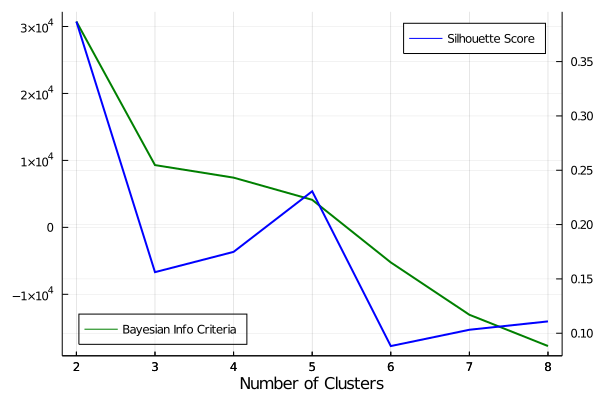

In [434]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [435]:
savefig("figures/bio_em_metrics_$upper")

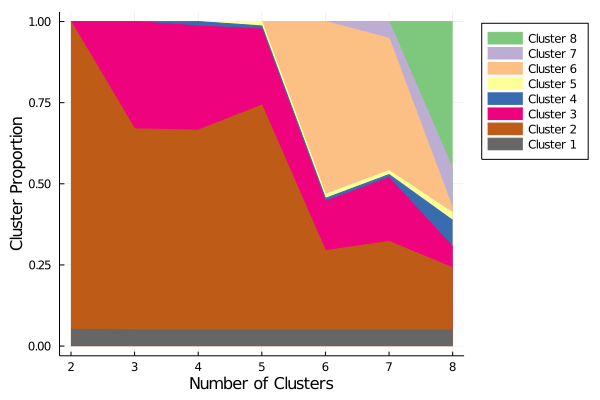

In [436]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [437]:
savefig("figures/bio_em_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 3 clusters

#### Verifying Clusters

In [401]:
y_1h = map(x-> if (x == "RB") 1 else 3 end , y[train])
collect(zip(assignments[2], y_1h))

738-element Array{Tuple{Int64,Int64},1}:
 (3, 3)
 (2, 1)
 (2, 3)
 (2, 1)
 (2, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (1, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (1, 3)
 (2, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (1, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (2, 3)
 (2, 1)
 (2, 1)
 (2, 3)
 (1, 3)
 (2, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (2, 3)
 (2, 1)
 (2, 1)
 (1, 3)
 (2, 3)
 (2, 3)
 (2, 3)
 ⋮
 (1, 3)
 (2, 3)
 (2, 1)
 (1, 3)
 (2, 3)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 3)
 (2, 3)
 (2, 3)
 (3, 3)
 (2, 1)
 (3, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (2, 3)
 (2, 1)
 (1, 1)
 (2, 3)
 (2, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (2, 1)
 (2, 1)
 (1, 3)
 (2, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (2, 3)
 (1, 1)
 (2, 3)
 (2, 1)
 (2, 3)
 (1, 3)
 (2, 3)
 (1, 3)
 (1, 3)
 (1, 3)
 (1, 3)
 (1, 3)
 (1, 3)

In [402]:
mutualinfo(assignments[2], y_1h)

0.08212566874325919

In [403]:
vmeasure(assignments[2], y_1h)

0.08212566874325888

In [404]:
randindex(assignments[2], y_1h)

(-0.01455863310929451, 0.4997665037708722, 0.5002334962291278, -0.00046699245825565446)

In [332]:
varinfo(assignments[2], y_1h)

1.2204090626662252

# Dimensionality Reduction
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA

In [438]:
info("PCA")

Principal component analysis. Learns a linear transformation to
project the data  on a lower dimensional space while preserving most of the initial
variance.

→ based on [MultivariateStats](https://github.com/JuliaStats/MultivariateStats.jl).
→ do `@load PCA pkg="MultivariateStats"` to use the model.
→ do `?PCA` for documentation.
(name = "PCA",
 package_name = "MultivariateStats",
 is_supervised = false,
 docstring = "Principal component analysis. Learns a linear transformation to\nproject the data  on a lower dimensional space while preserving most of the initial\nvariance.\n\n→ based on [MultivariateStats](https://github.com/JuliaStats/MultivariateStats.jl).\n→ do `@load PCA pkg=\"MultivariateStats\"` to use the model.\n→ do `?PCA` for documentation.",
 hyperparameter_ranges = (nothing, nothing, nothing, nothing),
 hyperparameter_types = ("Int64", "Symbol", "Float64", "Union{Nothing, Array{Float64,1}, Real}"),
 hyperparameters = (:maxoutdim, :method, :pratio, :mean),
 implemented_me

In [439]:
model = @load PCA pkg="MultivariateStats" 
mach = machine(model, X_stand)
MLJ.fit!(mach, rows=train)

┌ Warning: New model type being bound to `PCA2` to avoid conflict with an existing name. 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/JR7LJ/src/loading.jl:78
┌ Info: Training Machine{PCA} @091.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Machine{PCA} @091 trained 1 time.
  args: 
    1:	Source @968 ⏎ `Table{AbstractArray{Continuous,1}}`


In [440]:
report(mach)

(indim = 41,
 outdim = 31,
 tprincipalvar = 40.640745912578105,
 tresidualvar = 0.35925408742186704,
 tvar = 40.99999999999997,
 mean = [1.5013585075554284e-15, 2.496497438164563e-16, 4.441644282121646e-17, -3.26748564970981e-16, 1.0951793522047615e-16, 1.1087186573831171e-16, -1.4065833713069396e-16, 9.026203452237045e-18, -3.8963111568823247e-17, -1.3178257040266086e-16  …  1.8714328490971474e-16, 3.809057856844033e-16, 7.612098244719907e-17, 1.2937558281539763e-16, 1.7631184076703028e-16, 3.938433439659431e-16, 3.249433242805336e-17, 6.920089313381734e-17, -6.882480132330746e-17, -3.2535702527209446e-16],
 principalvars = [7.365169278970669, 5.276197258688738, 4.447795939959116, 3.46182804472242, 2.5752129469438554, 2.3507246508157364, 1.53008356261788, 1.3810299002614992, 1.3488981672125044, 1.2477764791908332  …  0.2834910784547285, 0.27220311313547957, 0.24357542929851844, 0.20118635510936028, 0.16105446559250355, 0.14939622617800993, 0.13851026959106083, 0.12705380716001205, 0.1

In [446]:
report(mach)[:principalvars]

31-element Array{Float64,1}:
 7.365169278970669
 5.276197258688738
 4.447795939959116
 3.46182804472242
 2.5752129469438554
 2.3507246508157364
 1.53008356261788
 1.3810299002614992
 1.3488981672125044
 1.2477764791908332
 1.1390790603797376
 0.9682358320449782
 0.9562858973658651
 0.8964541591885512
 0.7711392706182953
 0.683389074356612
 0.6559329318408003
 0.5575077652131084
 0.48066097324616114
 0.4061393261928559
 0.3619427953477185
 0.2834910784547285
 0.27220311313547957
 0.24357542929851844
 0.20118635510936028
 0.16105446559250355
 0.14939622617800993
 0.13851026959106083
 0.12705380716001205
 0.10604869992619334
 0.0967431529543019

In [443]:
fitted_params(mach)[1]

41×31 Array{Float64,2}:
 -0.268614    -0.105434      0.106583    …  -0.0529787   -0.3295
  0.00731336  -0.273362      0.146162        0.323619     0.0168663
 -0.171281     0.0881482     0.212152       -0.0669725    0.0972041
 -0.0892719   -0.00972932   -0.207002       -0.00925766   0.0276623
 -0.20291      0.00997635   -0.313449        0.235663     0.0136088
 -0.0950707   -0.246135      0.141048    …  -0.254201    -0.410481
 -0.271972     0.107273     -0.0529177       0.00644952   0.218579
 -0.180673     0.22291       0.0527646      -0.0829224    0.261041
 -0.0260051   -0.117448      0.00285581      0.0522201    0.221153
 -0.11213     -0.248188     -0.0572392      -0.0292987    0.0419845
 -0.20286      0.00716187   -0.33353     …   0.145538    -0.101558
  0.0796845    0.197379      0.0179564       0.0519477    0.0346639
 -0.31198     -0.0225799     0.11883         0.144164     0.248654
  0.0615548   -0.172326      0.00851041     -0.572836     0.0751431
 -0.300594    -0.0975345     0.04

In [448]:
model

PCA(
    maxoutdim = 0,
    method = :auto,
    pratio = 0.99,
    mean = nothing) @046

In [ ]:
# plot explained variance
max_dims=31
ex_vars = []

for i in 1:max_dims
    model.maxoutdim = i
    mach = machine(model, X_stand)
    MLJ.fit!(mach, rows=train) 
    
    r = report(mach)
    r[:]
    
    
end


In A3, we are ask to plot the distribution of eigenvalues of PCA. Do we need to plot the distribution of the eigenvalues or just the eigenvalues in a decreasing order? I find eigenvalues in a decreasing orders makes more sense given that we would like to consider the sum of these eigenvalues. Can anyone please clarify?

In [ ]:
#elbow method

### ICA

In [ ]:
kurtosis

### Randomized Projections

### Classical Multidimensional Scaling
* https://multivariatestatsjl.readthedocs.io/en/stable/cmds.html

# Clustering Pt 2
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.

### Kmeans - PCA

### EM - PCA

### Kmeans - ICA

### EM - ICA

### Kmeans - Randomized Projections

### EM - Randomized Projections

### Kmeans - Classical Multidimensional Scaling

### EM - Classical Multidimensional Scaling

# BELOW ONLY FOR 1 DATASET

### Dimensionality Reduction + NN 
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1. (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

### Clustering + NN
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

In [ ]:
# do one hot encoding or proabilisitc encoding. Features will be the one hot encodings